In [1]:
from __future__ import division
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
from sklearn import datasets, preprocessing
import tensorflow as tf

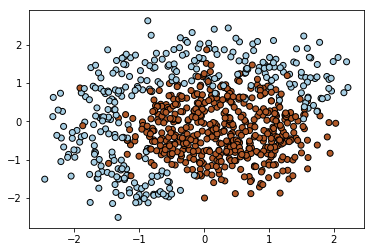

In [2]:
(X, y) = datasets.make_circles(n_samples=1024, shuffle=True, noise=0.2, factor=0.4)
ind = np.logical_or(y==1, X[:,1] > X[:,0] - 0.5)
X = X[ind,:]
X = preprocessing.scale(X)
y = y[ind]
y = 2*y - 1
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.Paired, c=y, edgecolors='black')

plt.show()

In [3]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def visualize(X, y, w, loss, n_iter):
    plt.clf()
    plt.figure(figsize=(20, 8))
    Z = classify(np.c_[xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())


**Your task starts here**

First, let's write a function that predicts class for given X.

Since the problem above isn't linearly separable, we add quadratic features to the classifier. This transformation is implemented in the __expand__ function.

__Don't forget to expand X inside classify and other functions__

Sample classification should not be much harder than computation of sign of dot product.

In [46]:
def expand(X):
#     """
    X0 = tf.transpose(tf.gather(tf.transpose(X), [0]))
    X1 = tf.transpose(tf.gather(tf.transpose(X), [1]))
    ones = tf.reshape(tf.ones_like(X0), [-1, 1])
    return tf.concat([X, X ** 2, X0 * X1, ones], axis=1)
#     X_ = tf.zeros((X.shape[0], 6))
#     X0 = tf.transpose(tf.gather(tf.transpose(X), [0]))
#     X1 = tf.transpose(tf.gather(tf.transpose(X), [1]))
#     X_ = tf.concat([X, X ** 2, X0 * X1, tf.ones(shape=(X.shape[0], 1), dtype=tf.float32)], axis=1)
#     return X_

def classify(X, w):
    """
    Given feature matrix X [n_samples,2] and weight vector w [6],
    return an array of +1 or -1 predictions
    """
    X = expand(X)
    X = X.astype(dtype=np.float32)
    w = w.astype(dtype=np.float32)
    return  tf.sign(tf.tensordot(X, w, axes = 1))

The loss you should try to minimize is the Hinge Loss:

$$ L =  {1 \over N} \sum_{i=1}^N max(0,1-y_i \cdot  w^T x_i) $$



In [13]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,2], target vector [n_samples] of +1/-1,
    and weight vector w [6], compute scalar loss function using formula above.
    """
    N = y.shape[0]
    X = expand(X)
    value_ =  y * tf.tensordot(X, w, axes=1)
    max_ = tf.maximum( tf.zeros(y.shape), tf.ones(y.shape) - value_)
    return tf.reduce_sum( max_ ) / N

    
def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,2], target vector [n_samples] of +1/-1,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    """
    N = y.shape[0]
    X = expand(X)
    value_ =  y * tf.tensordot(X, w, axes=1)
    mask = tf.where(value_ >= 0, tf.ones_like(value_), tf.zeros_like(value_))
    
    return tf.reduce_sum( tf.tensordot(-mask * y), X, axes=0) / N;
    

### Training
Find an optimal learning rate for gradient descent for given batch size. 

You can see the example of correct output below this cell before you run it.

**Don't change the batch size!**

In [32]:
w = np.array([1,0,0,0,0,0], dtype=np.float32)


alpha = 0 # learning rate

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))

In [33]:
X = X.astype(dtype=np.float32)
y = y.astype(dtype=np.float32)

In [47]:


with tf.Session() as sess:
    for i in range(n_iter):
        print("iter ", i)
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] = sess.run(compute_loss(X[ind], y[ind], w))
        visualize(X[ind,:], y[ind], w, loss, n_iter)

        grad = compute_grad(X[ind], y[ind], w)
        w = sess.run(w - grad * alpha)

visualize(X, y, w, loss, n_iter)
plt.clf()

iter  0


AttributeError: 'Tensor' object has no attribute 'astype'

Implement gradient descent with momentum and test it's performance for different learning rate and momentum values.

In [ ]:
w = np.array([1,0,0,0,0,0], dtype=tf.float32)

alpha = 0 # learning rate
mu    = 0 # momentum

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
with tf.Session() as sess:
    for i in range(n_iter):
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] sess.run(#
        visualize(X[ind,:], y[ind], w, loss, n_iter)

        w = sess.run(#)

visualize(X, y, w, loss, n_iter)
plt.clf()

Same task but for Nesterov's accelerated gradient:

In [ ]:
w = np.array([1,0,0,0,0,0], dtype=tf.float32)

alpha = 0 # learning rate
mu    = 0 # momentum

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
with tf.Session() as sess:
    for i in range(n_iter):
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] sess.run(#
        visualize(X[ind,:], y[ind], w, loss, n_iter)

        w = sess.run(#)

visualize(X, y, w, loss, n_iter)
plt.clf()

Same task but for AdaGrad:

In [ ]:
w = np.array([1,0,0,0,0,0], dtype=tf.float32)

alpha = 0 # learning rate
mu    = 0 # momentum
eps = 1e-8  # A small constant for numerical stability

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
with tf.Session() as sess:
    for i in range(n_iter):
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] sess.run(#
        visualize(X[ind,:], y[ind], w, loss, n_iter)

        w = sess.run(#)

visualize(X, y, w, loss, n_iter)
plt.clf()

Same task but for AdaDelta:

In [ ]:
w = np.array([1,0,0,0,0,0], dtype=tf.float32)

alpha = 0 # learning rate
beta = 0
mu    = 0 # momentum
eps = 1e-8  # A small constant for numerical stability

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
with tf.Session() as sess:
    for i in range(n_iter):
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] sess.run(#
        visualize(X[ind,:], y[ind], w, loss, n_iter)

        w = sess.run(#)

visualize(X, y, w, loss, n_iter)
plt.clf()

Same task for Adam algorithm. You can start with beta = 0.9 and mu = 0.999

In [ ]:
w = np.array([1,0,0,0,0,0], dtype=tf.float32)

alpha = 0 # learning rate
beta = 0  # (beta1 coefficient in original paper) exponential decay rate for the 1st moment estimates
mu   = 0  # (beta2 coefficient in original paper) exponential decay rate for the 2nd moment estimates
eps = 1e-8  # A small constant for numerical stability

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
with tf.Session() as sess:
    for i in range(n_iter):
        ind = random.sample(range(X.shape[0]), batch_size)
        loss[i] sess.run(#
        visualize(X[ind,:], y[ind], w, loss, n_iter)

        w = sess.run(#)

visualize(X, y, w, loss, n_iter)
plt.clf()